# Image Processing and Classification With yale data

## Required Imports

In [1]:
import os     # loads a library to work with data files
from os import listdir # loads a library to work with directories 

import pandas as pd

from matplotlib import image # loads a library to work with images
from matplotlib import pyplot # loads a library to plot images
import seaborn as sns

import numpy as np  # loads a library for working with matrixes 
from numpy import asarray # loads a library for saving matrices
from numpy import save

from sklearn.model_selection import train_test_split # loads functions from the ML library sklearn 
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix



## Working with files

In [2]:
!ls "./" # shows all files in root, including the project data file Tr0
path = "./" # sets the path to the root with the file Tr0

'Assignment Design of Machine Learning Solution for Biometric Recognition Task.ipynb'
 classify_yale.ipynb
'Photo processing and classification.ipynb'
 process_yale_images.ipynb
 Tr0
 Tr0.zip
 yaleExtB_data.npy
 yaleExtB_target.npy


In [3]:
os.chdir(path) 
dnam = 'Tr0'
# !unzip -q {dnam} # unzups the project file Tr0

In [4]:
fls = listdir(path + dnam) # creates a list of all image files
n = len(fls) # the number of the image files  
print('Number of images %i' % n)

Number of images 1500


## Working with images and dataset

(77, 68)


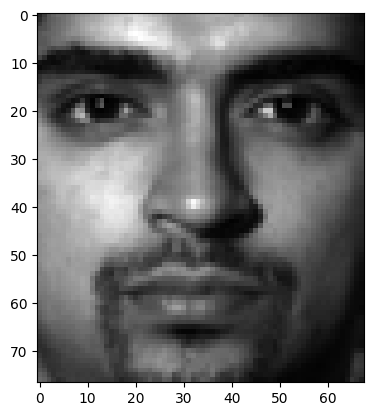

In [5]:
im1 = image.imread(path + dnam + '/' + fls[0]) # chooses 1st image from the image list
print(im1.shape) # prints the size in pixels of the chosen image 
pyplot.imshow(im1, cmap=pyplot.cm.gray) # displays the image
pyplot.show()

In [6]:
m=im1.shape[0]*im1.shape[1]  # m = h*w = (77*68=5236) is the number of pixels in images
images_data = np.zeros((n, m)) # creates a nxm-matrix of the images
images_target = np.zeros((n,))  # creates a n*1 matrix of targets which are the person labels 1 tp 30
# loops over all n=1500 images 
for i in range(0, n):
  filename = fls[i]  # loads a name of the image file
  img = image.imread(path + dnam + '/' + filename) # loads the image name
  images_data[i,:] = np.ravel(img) # vectorisation of the image 
  c = int(filename[5:7])  # extracts the class label from the file name
  images_target[i] = c  # assigns the target 
  #if i % 10 == 0:
  #  print('> loaded %s %s %s' % (i, filename, c)) # prints the image name

In [7]:
# save as a .npy file
# fn = (path + '/' + 'yaleExtB_data.npy') # creates the file name for the image data
# save(fn, images_data) 
# fn = (path + '/' + 'yaleExtB_target.npy') # creates the file name for the targets
# save(fn, images_target)


In [8]:
# shows the files in the root, including 2 files *.npy 
!ls "./" 


'Assignment Design of Machine Learning Solution for Biometric Recognition Task.ipynb'
 classify_yale.ipynb
'Photo processing and classification.ipynb'
 process_yale_images.ipynb
 Tr0
 Tr0.zip
 yaleExtB_data.npy
 yaleExtB_target.npy


## Working with npy files

### Loading 2 npy files for processing

In [9]:
# load the 2 npy files created by the process_yale_images.ipynb 
from numpy import load
import numpy as np
path = './'
# load array
y = load(path + 'yaleExtB_target.npy')
X = load(path + 'yaleExtB_data.npy')

### Spliting dataset into tranning and testing set

In [10]:
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

### Principal Component Analysis (PCA) on the dataset

In [11]:
# PCA 
nof_prin_components = 250  # PARAMETER for optimisation in expereiments
pca = PCA(n_components=nof_prin_components, whiten=True).fit(X_train)
# applies PCA to the train and test images to calculate the principal components
X_train_pca = pca.transform(X_train) 
X_test_pca = pca.transform(X_test)

# Tranning Neural Network

## Initializing Classifiers

### MLP CLassifier

In [12]:
# train a neural network
nohn = 180 # nof hidden neurons
print("Fitting the classifier to the training set")
clf_mlp = MLPClassifier(hidden_layer_sizes=(nohn,), 
                    solver='lbfgs', 
                    activation='tanh', 
                    batch_size=120, 
                    verbose=False,
                    random_state=5,
                    early_stopping=True)
mlp_clf = clf_mlp.fit(X_train_pca, y_train)

Fitting the classifier to the training set


### AdaBooster Classifier

In [13]:
# AdaBoost Classifier

clf_abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), 
                              n_estimators=250, 
                              algorithm="SAMME.R",
                              learning_rate=0.1)
abc_clf = clf_abc.fit(X_train_pca, y_train)


### Pairwise classifier

In [14]:
# SV Classifier

clf_svc = OneVsOneClassifier(LinearSVC())
svc_clf = clf_svc.fit(X_train_pca, y_train)


### MLP Classifier using GridSearchCV

In [15]:
# mlp_gs = MLPClassifier(max_iter=200)

# parameter_space = {
#     'hidden_layer_sizes': [(150,),(200,),(300,)],
#     'activation': ['tanh','relu'],
#     'solver': ['sgd','lbfgs','adam'],
#     'alpha':[0.1,0.5,0.7],
#     'learning_rate':['constant','adaptive']
# }

# clf_gscv = GridSearchCV(mlp_gs,parameter_space, n_jobs=-1,cv=5)

# gscv_clf = clf_gscv.fit(X_train_pca,y_train)

## Creating Functions 


### Function to evaluate the performance of the MLP classifier and return the predicted labels for the test data

In [16]:
def result(X_test_pca_data, y_test_data, clf_data, X_train_pca_data, y_train_data):
    
    # Prediction of the labels of the test data using the trained MLPClassifier
    y_pred = clf_data.predict(X_test_pca_data)
    
    # classification report showing the accuracy, precision, recall, and F1-score for each class
    print(classification_report(y_test_data, y_pred))
    
    # 5-fold cross-validation on the training data using the trained MLPClassifier
    cross_val_result = cross_val_score(clf_data, X_train_pca_data, y_train, cv=5)
    
    print("Cross-validation scores:\n", cross_val_result, "\n")
    print("Average accuracy:\n", np.mean(cross_val_result))
    
    return y_pred


### Function to draw loss curve from MLP classifier

In [17]:
# def loss_curve(mlp):
    
#     loss_values = mlp.loss_curve_
    
#     plt.plot(loss_values)
#     plt.show()

###  function to compare the true labels for the test data with the predicted labels for the test data

In [18]:
def output_visulizer(y_pred_data):

    # Setting pandas options to display more data
    pd.set_option('display.max_rows', 500)
    pd.set_option('display.max_columns', 10)
    
    # Dictionary with the true labels for the test data
    data = {'target':y_test}
    
    # Convert the dictionary to a pandas DataFrame
    worksheet = pd.DataFrame(data)
    
    # Add column to the DataFrame with the predicted labels for the test data
    worksheet['mlp_y_pred'] = y_pred_data
    
    print(worksheet)


### Function to compute confusion matrix and perform confusion matrix plot

In [19]:
def confusion_metrix(y_test_data, y_pred_data):
   
    # Computing the confusion matrix using the true and predicted labels
    cm = confusion_matrix(y_test_data,y_pred_data)
    
    # Print the confusion matrix
    print(cm)
    
    # Defining the classes and tick labels for the confusion matrix plot
    classes = np.unique(y_test_data)
    xticklabels = classes.astype(int).astype(str).tolist()
    yticklabels = classes.astype(int).astype(str).tolist()
    
    # Creating a subplot and plot the confusion matrix using a heatmap
    ax = pyplot.subplot()
    sns.heatmap(cm, 
                annot=True, 
                fmt = 'g', 
                ax=ax,
                xticklabels = xticklabels,
                yticklabels = yticklabels)
    
    # Add labels and a title to the plot
    ax.set_xlabel('predicted Labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion matrix')


### Function to Draw ROC Curve

In [20]:
def roc_curve(mlp, X_train_pca, y_train, X_test_pca):

    # Preparing data for ROC curve display

    y_score = mlp.fit(X_train_pca, y_train).predict_proba(X_test_pca)

    label_binarizer = LabelBinarizer().fit(y_train)
    y_onehot_test = label_binarizer.transform(y_test)
    print('Test shape', y_onehot_test.shape)  # (n_samples, n_classes)

    class_of_interest = 39.0
    class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
    print('Corresponding class id', class_id)

    
    RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
    )
    pyplot.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
    pyplot.axis("square")
    pyplot.xlabel("False Positive Rate")
    pyplot.ylabel("True Positive Rate")
    pyplot.title(f"One-vs-Rest ROC curves: \nClass {class_of_interest} vs. rest of the classes")
    pyplot.legend()
    pyplot.show()
    
    roc_auc_score(y_onehot_test[:, class_id],y_score[:, class_id])


## MLP Classifier Result

In [21]:
mlp_y_pred = result(X_test_pca, y_test, mlp_clf, X_train_pca, y_train)


              precision    recall  f1-score   support

         2.0       0.94      1.00      0.97        15
         3.0       0.94      0.94      0.94        17
         4.0       0.92      0.92      0.92        13
         5.0       0.89      0.94      0.92        18
         6.0       1.00      0.93      0.97        15
         7.0       0.91      0.95      0.93        21
         8.0       0.93      0.88      0.90        16
         9.0       1.00      0.95      0.97        19
        11.0       1.00      1.00      1.00        18
        12.0       1.00      0.94      0.97        16
        13.0       1.00      1.00      1.00        17
        15.0       1.00      1.00      1.00        15
        16.0       0.87      1.00      0.93        20
        17.0       1.00      0.94      0.97        18
        18.0       1.00      1.00      1.00        12
        20.0       0.88      0.94      0.91        16
        22.0       1.00      1.00      1.00        21
        23.0       1.00    

In [22]:
output_visulizer(mlp_y_pred)


     target  mlp_y_pred
0       4.0         4.0
1      38.0        38.0
2      23.0        23.0
3      37.0        37.0
4      20.0        20.0
5      12.0        12.0
6      15.0        15.0
7      16.0        16.0
8       7.0         7.0
9      32.0        38.0
10     17.0        17.0
11     37.0        37.0
12     17.0        17.0
13     33.0        33.0
14      6.0         6.0
15     18.0        18.0
16     39.0        39.0
17     35.0        35.0
18     24.0        24.0
19     16.0        16.0
20     13.0        13.0
21     12.0        12.0
22     24.0        24.0
23     34.0         8.0
24      7.0         7.0
25      5.0        27.0
26     15.0        15.0
27     32.0        32.0
28     38.0        38.0
29     34.0        34.0
30     13.0        13.0
31     16.0        16.0
32     20.0        20.0
33      8.0         8.0
34     24.0        24.0
35     15.0        15.0
36      5.0         5.0
37     11.0        11.0
38     37.0        37.0
39     25.0        25.0
40     26.0     

[[15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 1 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0 12  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0 14  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  1
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0 

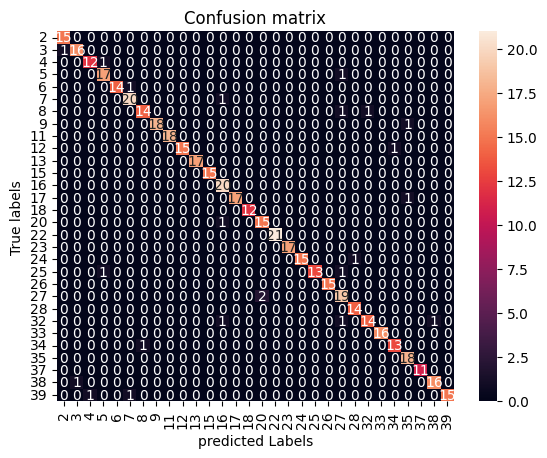

In [23]:
confusion_metrix(y_test, mlp_y_pred)


Test shape (495, 30)
Corresponding class id 29


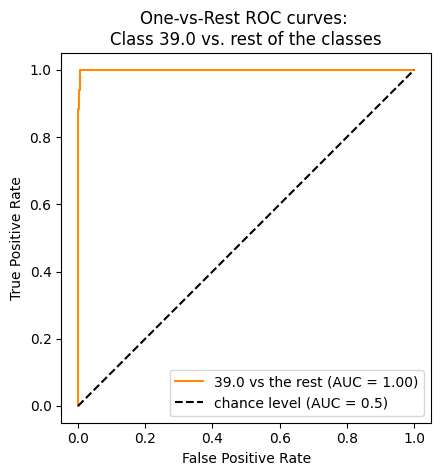

In [24]:
roc_curve(mlp_clf, X_train_pca, y_train, X_test_pca)


## AdaBooster Classifier Result

In [25]:
abc_y_pred = result(X_test_pca, y_test, abc_clf, X_train_pca, y_train)


              precision    recall  f1-score   support

         2.0       1.00      0.73      0.85        15
         3.0       0.67      0.71      0.69        17
         4.0       0.92      0.92      0.92        13
         5.0       0.91      0.56      0.69        18
         6.0       0.80      0.80      0.80        15
         7.0       1.00      0.57      0.73        21
         8.0       0.76      0.81      0.79        16
         9.0       1.00      0.68      0.81        19
        11.0       0.75      0.83      0.79        18
        12.0       0.85      0.69      0.76        16
        13.0       0.93      0.82      0.87        17
        15.0       0.83      0.67      0.74        15
        16.0       0.90      0.90      0.90        20
        17.0       0.89      0.89      0.89        18
        18.0       1.00      0.75      0.86        12
        20.0       0.78      0.88      0.82        16
        22.0       0.82      0.67      0.74        21
        23.0       0.52    

In [26]:
output_visulizer(abc_y_pred)


     target  mlp_y_pred
0       4.0         4.0
1      38.0        38.0
2      23.0        23.0
3      37.0        37.0
4      20.0        20.0
5      12.0        12.0
6      15.0        15.0
7      16.0        16.0
8       7.0        17.0
9      32.0        25.0
10     17.0        17.0
11     37.0        37.0
12     17.0        17.0
13     33.0        33.0
14      6.0         6.0
15     18.0        22.0
16     39.0        39.0
17     35.0        35.0
18     24.0        27.0
19     16.0        16.0
20     13.0        22.0
21     12.0        12.0
22     24.0        24.0
23     34.0        38.0
24      7.0         7.0
25      5.0        37.0
26     15.0        15.0
27     32.0        32.0
28     38.0        38.0
29     34.0        34.0
30     13.0        13.0
31     16.0        16.0
32     20.0        20.0
33      8.0         8.0
34     24.0        25.0
35     15.0        33.0
36      5.0         5.0
37     11.0        11.0
38     37.0        37.0
39     25.0        25.0
40     26.0     

[[11  0  0  0  0  0  0  0  0  1  0  0  0  1  0  0  0  0  0  0  0  0  0  0
   0  0  0  2  0  0]
 [ 0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  2  3  0]
 [ 0  0 12  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  1  0  1
   0  2  0  3  0  0]
 [ 0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  0  0
   1  0  0  0  0  0]
 [ 0  0  0  0  0 12  0  0  0  0  1  0  2  1  0  1  0  1  0  0  0  0  0  0
   0  1  1  0  1  0]
 [ 0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0
   2  0  0  0  0  0]
 [ 0  0  0  0  0  0  1 13  1  0  0  0  0  0  0  0  0  4  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  1  0  0  1  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   1  0  0  2  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 14  1  0  0  0  0 

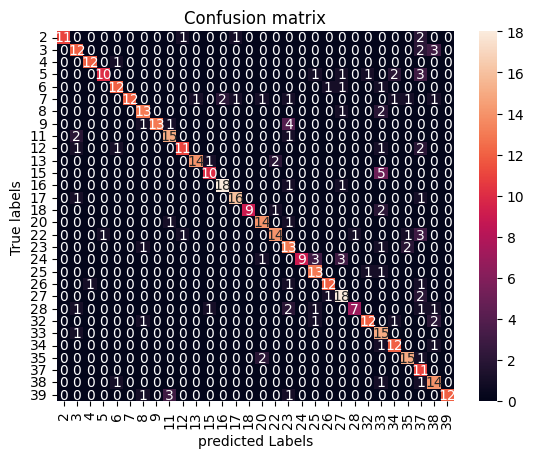

In [27]:
confusion_metrix(y_test, abc_y_pred)


Test shape (495, 30)
Corresponding class id 29


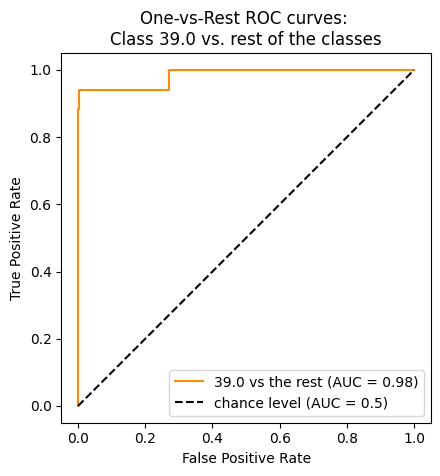

In [28]:
roc_curve(abc_clf, X_train_pca, y_train, X_test_pca)


## Pairwise CLassifier Result

In [29]:
svc_y_pred = result(X_test_pca, y_test, svc_clf, X_train_pca, y_train)


              precision    recall  f1-score   support

         2.0       1.00      1.00      1.00        15
         3.0       1.00      0.94      0.97        17
         4.0       0.87      1.00      0.93        13
         5.0       1.00      0.89      0.94        18
         6.0       1.00      0.93      0.97        15
         7.0       0.95      1.00      0.98        21
         8.0       0.88      0.88      0.88        16
         9.0       1.00      0.95      0.97        19
        11.0       1.00      0.94      0.97        18
        12.0       1.00      1.00      1.00        16
        13.0       1.00      1.00      1.00        17
        15.0       1.00      1.00      1.00        15
        16.0       0.87      1.00      0.93        20
        17.0       1.00      0.94      0.97        18
        18.0       1.00      1.00      1.00        12
        20.0       0.78      0.88      0.82        16
        22.0       1.00      0.95      0.98        21
        23.0       0.94    

In [30]:
output_visulizer(svc_y_pred)


     target  mlp_y_pred
0       4.0         4.0
1      38.0        38.0
2      23.0        23.0
3      37.0        37.0
4      20.0         7.0
5      12.0        12.0
6      15.0        15.0
7      16.0        16.0
8       7.0         7.0
9      32.0        38.0
10     17.0        17.0
11     37.0        37.0
12     17.0        17.0
13     33.0        33.0
14      6.0         6.0
15     18.0        18.0
16     39.0        39.0
17     35.0        35.0
18     24.0        24.0
19     16.0        16.0
20     13.0        13.0
21     12.0        12.0
22     24.0        24.0
23     34.0         8.0
24      7.0         7.0
25      5.0        27.0
26     15.0        15.0
27     32.0        32.0
28     38.0        38.0
29     34.0        34.0
30     13.0        13.0
31     16.0        16.0
32     20.0        20.0
33      8.0         8.0
34     24.0        24.0
35     15.0        15.0
36      5.0         5.0
37     11.0        11.0
38     37.0        37.0
39     25.0        25.0
40     26.0     

[[15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  1  0]
 [ 0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  1  0  0  1  0]
 [ 0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0 

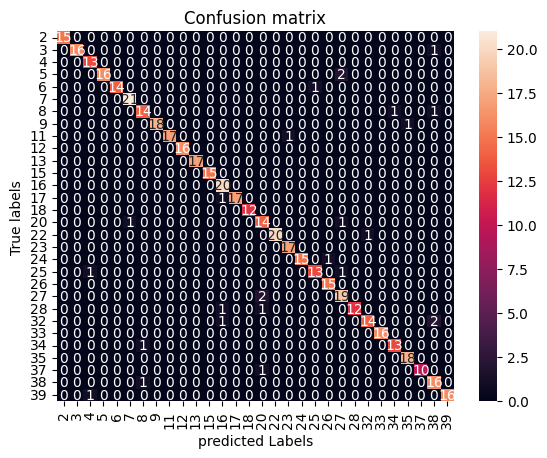

In [31]:
confusion_metrix(y_test, svc_y_pred)


In [33]:
# roc_curve(svc_clf, X_train_pca, y_train, X_test_pca)
